'''
Names: Marlan Mc-Innes Taylor, Timothy Barao
FSUID: mm05f, tjb13b

'''

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
#Fairly certain this is working
def predict(samples, W):
    prod = np.exp(W[0] + np.dot(samples, W))
    pred_1 = prod / (1 + prod)
    pred_0 = 1  / (1 + prod)
   
    return np.round(pred_1)

#Gradient may be right
def gradient(X, Y, W):
    prod = W[0] + np.dot(X, W) 
    #preds = predict(X, W)
    d = (Y.flatten() - (np.exp(prod) / (1 + np.exp(prod)))) 
    gw = np.dot(X.T, d)    
    return gw

#Loss is wrong
def loss(X, Y, W):
    prod = np.exp(W[0] + np.dot(X, W))
    #print(prod)
    #prods = (1/(1 + prod))
    prods = np.zeros(len(Y))
    
    
    #for i in range(0, len(prods)):
    #    if Y[i] == 1:
    #        prods[i] = (prod[i]) / (1+prod[i])
    #    else:
    #        prods[i] = 1 / (1+prod[i])
    
    pred_1 = np.where(Y == 1)    
    pred_0 = np.where(Y == 0)     

    #print("DASDSADSADSA", len(pred_0) + len(pred_1))
    
    for i in pred_1:
        prods[i] =  (prod[i])/(1+prod[i])           #prods[i] * prod[i]       #(np.exp(W[0] + np.dot(X[i], W[i])))
    for i in pred_0:
        prods[i] = (1)/(1+prod[i])
      
    prods = np.log(prods+0.00000000001).sum()
    
    return prods



In [4]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
#learning_rates = [1.0, 0.1, 0.001]
shrinkage = 0.0001
iterations = 1000

In [5]:
x_train_file = "data/Gisette/gisette_train.data"
y_train_file = "data/Gisette/gisette_train.labels"

x_valid_file = "data/Gisette/gisette_valid.data"
y_valid_file = "data/Gisette/gisette_valid.labels"

In [6]:
with open(x_train_file) as file:
    x_train = pd.read_csv(file, delim_whitespace=True, header=None)
    x_train = x_train.to_numpy()
    #print(x_train)

with open(y_train_file) as file:
    y_train = pd.read_csv(file, header=None)
    y_train = y_train.to_numpy()
    #print(y_train)
    
with open(x_valid_file) as file:
    x_valid = pd.read_csv(file, delim_whitespace=True, header=None)
    x_valid = x_valid.to_numpy()
    #print(x_train)

with open(y_valid_file) as file:
    y_valid = pd.read_csv(file, header=None)
    y_valid = y_valid.to_numpy()
    #print(y_train)

N = x_train.shape[0]   
M = x_train.shape[1]    
    
x_valid = (x_valid - x_valid.mean())/(x_valid.std())
x_valid = np.insert(x_valid, 0, 1, axis=1)

x_train = (x_train - x_train.mean())/(x_train.std())
x_train = np.insert(x_train, 0, 1, axis=1)

y_valid = np.where(y_valid == -1, 0, y_valid)  
y_train = np.where(y_train == -1, 0, y_train)

print("mean: ", x_train.mean())
print("std: ", x_train.std())
print(N)
print(M)

mean:  0.00019996000799843533
std:  0.9999999800079977
6000
5000


Lr: 0.0001 Iteration: 999  Loss: -1634.4657521432705

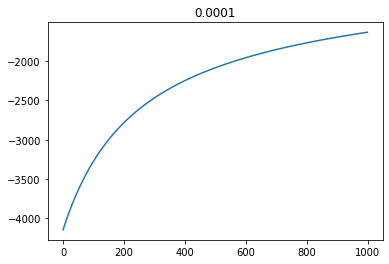

,Training,Validation
Error (%),6.616667,7.1





Lr: 0.001 Iteration: 999  Loss: -714.83594804047816

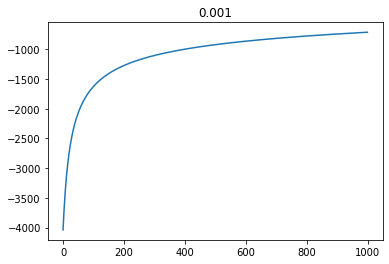

,Training,Validation
Error (%),3.166667,3.3





Lr: 0.01 Iteration: 999  Loss: -205.62857376732074

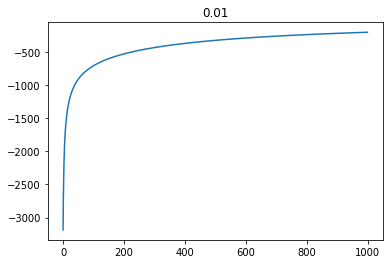

,Training,Validation
Error (%),0.35,2.1





Lr: 0.1 Iteration: 999  Loss: -37.225951924000764

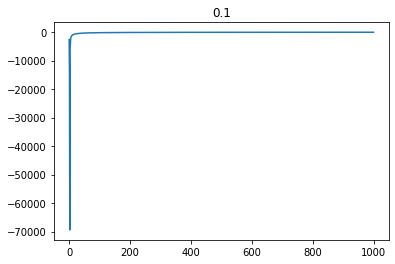

,Training,Validation
Error (%),0.0,2.2





Lr: 1.0 Iteration: 999  Loss: -25.990804954623787

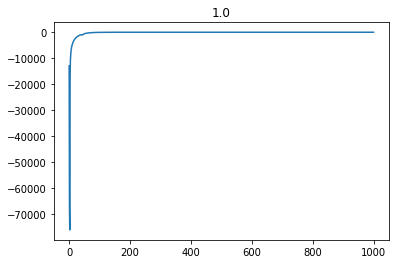

,Training,Validation
Error (%),0.0,2.9


In [7]:
Error = pd.DataFrame({"Training":[0],
                     "Validation":[0]}, index=["Error (%)"])

for lr in learning_rates:
    
    W = np.zeros(M+1)
    L_i = [] 

    for i in range(0, iterations):
        gw = gradient(x_train, y_train, W)
        W = W - (lr*shrinkage*W) + ((lr/N) * gw)
        l = loss(x_train, y_train, W)    
        L_i.append(l)
        print("\rLr: " + str(lr) + " Iteration: " + str(i) + "  Loss: " + str(l), sep='', end='', flush=True)

    plt.plot(L_i)
    plt.title(lr)
    plt.show()
    
    preds = predict(x_train, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_train[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Training'] = 100 - (((N-missed)/N) * 100)

    preds = predict(x_valid, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_valid[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Validation'] = 100 - (((x_valid.shape[0]-missed)/x_valid.shape[0]) * 100)

    display(Error)
    
    print("\n\n")

#plt.legend()    
#plt.show()


In [8]:
x_train_file = "data/MADELON/madelon_train.data"
y_train_file = "data/MADELON/madelon_train.labels"

x_valid_file = "data/MADELON/madelon_valid.data"
y_valid_file = "data/MADELON/madelon_valid.labels"

In [9]:
with open(x_train_file) as file:
    x_train = pd.read_csv(file, delim_whitespace=True, header=None)
    x_train = x_train.to_numpy()
    #print(x_train)

with open(y_train_file) as file:
    y_train = pd.read_csv(file, header=None)
    y_train = y_train.to_numpy()
    #print(y_train)
    
with open(x_valid_file) as file:
    x_valid = pd.read_csv(file, delim_whitespace=True, header=None)
    x_valid = x_valid.to_numpy()
    #print(x_train)

with open(y_valid_file) as file:
    y_valid = pd.read_csv(file, header=None)
    y_valid = y_valid.to_numpy()
    #print(y_train)

N = x_train.shape[0]   
M = x_train.shape[1]
    
x_valid = (x_valid - x_valid.mean())/(x_valid.std())
x_valid = np.insert(x_valid, 0, 1, axis=1)

x_train = (x_train - x_train.mean())/(x_train.std())
x_train = np.insert(x_train, 0, 1, axis=1)

y_valid = np.where(y_valid == -1, 0, y_valid)
y_train = np.where(y_train == -1, 0, y_train)


print("mean: ", x_train.mean())
print("std: ", x_train.std())

mean:  0.0019960079840323345
std:  0.9999980079740799


LR: 0.0001 Iteration: 999  Loss: -0.6688667092507896

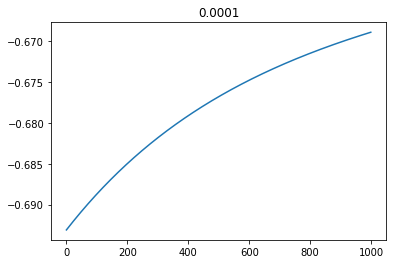

,Training,Validation
Error (%),39.1,40.5





LR: 0.001 Iteration: 999  Loss: -0.6340659774315841

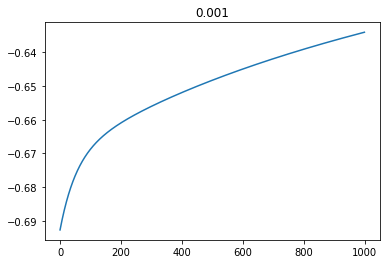

,Training,Validation
Error (%),35.9,41.666667





LR: 0.01 Iteration: 999  Loss: -0.5732757940920655

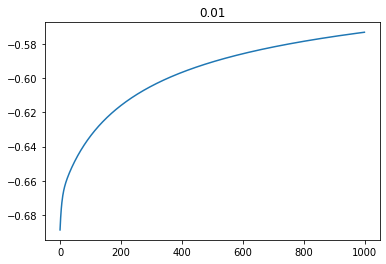

,Training,Validation
Error (%),29.7,43.333333





LR: 0.1 Iteration: 999  Loss: -0.5346298514726417

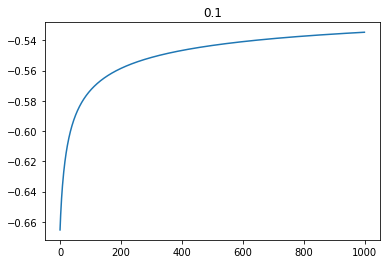

,Training,Validation
Error (%),26.95,41.333333





LR: 1.0 Iteration: 999  Loss: -2.5956636121557603

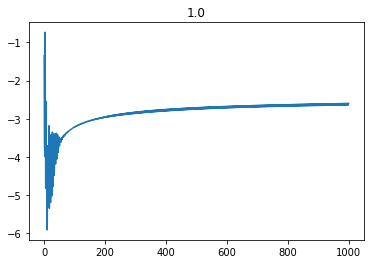

,Training,Validation
Error (%),36.4,45.5


In [10]:
Error = pd.DataFrame({"Training":[0],
                     "Validation":[0]}, index=["Error (%)"])

for lr in learning_rates:
    W = np.zeros(M+1)
    L_i = [] 

    for i in range(0, iterations):
        gw = gradient(x_train, y_train, W)
        W = W - (lr*shrinkage*W) + ((lr/N) * gw)
        l = loss(x_train, y_train, W)/N    
        L_i.append(l)
        print("\rLR: " + str(lr) + " Iteration: " + str(i) + "  Loss: " + str(l), sep='', end='', flush=True)

    plt.plot(L_i)
    plt.title(lr)
    plt.show()
    
    preds = predict(x_train, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_train[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Training'] = 100 - (((N-missed)/N) * 100)

    preds = predict(x_valid, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_valid[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Validation'] = 100 - (((x_valid.shape[0]-missed)/x_valid.shape[0]) * 100)

    display(Error)
    
    print("\n\n")


In [11]:
x_train_file = "data/dexter/dexter_train.data"
y_train_file = "data/dexter/dexter_train.labels"

x_valid_file = "data/dexter/dexter_valid.data"
y_valid_file = "data/dexter/dexter_valid.labels"

In [12]:
with open(x_train_file) as file:
    x_train = np.zeros((300, 20000))
    trainingData = csv.reader(file, delimiter=' ')
    
    for i,row in enumerate(trainingData):
        for value in row:
            if value != '':
                indx_Val = value.split(':')
                x_train[i,int(indx_Val[0])] = int(indx_Val[1])

with open(y_train_file) as file:
    y_train = pd.read_csv(file, header=None)
    y_train = y_train.to_numpy()

with open(x_valid_file) as file:
    x_valid = np.zeros((300, 20000))
    trainingData = csv.reader(file, delimiter=' ')

    for i,row in enumerate(trainingData):
        for value in row:
            if value != '':
                indx_Val = value.split(':')
                x_valid[i,int(indx_Val[0])] = int(indx_Val[1])

with open(y_valid_file) as file:
    y_valid = pd.read_csv(file, header=None)
    y_valid = y_valid.to_numpy()

N = x_train.shape[0]   
M = x_train.shape[1]
    
x_valid = (x_valid - x_valid.mean())/(x_valid.std())
x_valid = np.insert(x_valid, 0, 1, axis=1)

x_train = (x_train - x_train.mean())/(x_train.std())
x_train = np.insert(x_train, 0, 1, axis=1)

y_valid = np.where(y_valid == -1, 0, y_valid)
y_train = np.where(y_train == -1, 0, y_train)

print("mean: ", x_train.mean())
print("std: ", x_train.std())

mean:  4.999750012500777e-05
std:  0.9999999987501252


LR: 0.0001 Iteration: 999  Loss: -0.09628476486862123

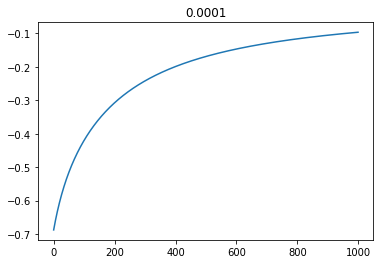

,Training,Validation
Error (%),0.0,8.0





LR: 0.001 Iteration: 999  Loss: -0.022065472718805764

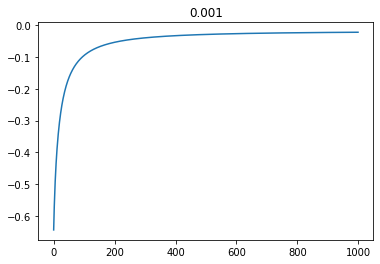

,Training,Validation
Error (%),0.0,8.0





LR: 0.01 Iteration: 999  Loss: -0.021673176556860782

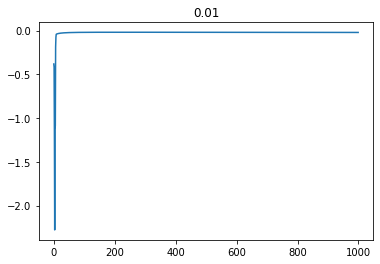

,Training,Validation
Error (%),0.0,7.0





LR: 0.1 Iteration: 999  Loss: -0.046641295942895014

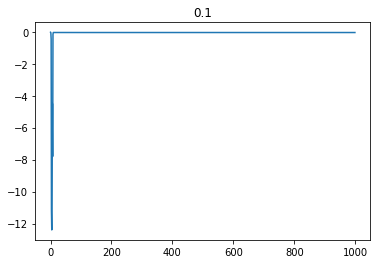

,Training,Validation
Error (%),0.0,9.666667





LR: 1.0 Iteration: 999  Loss: -0.045035046764194576

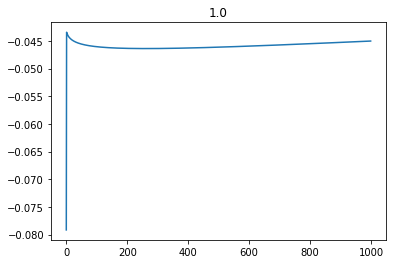

,Training,Validation
Error (%),0.0,9.0


In [13]:
Error = pd.DataFrame({"Training":[0],
                     "Validation":[0]}, index=["Error (%)"])

for lr in learning_rates:
    W = np.zeros(M+1)
    L_i = [] 

    for i in range(0, iterations):
        gw = gradient(x_train, y_train, W)
        W = W - (lr*shrinkage*W) + ((lr/N) * gw)
        l = loss(x_train, y_train, W)/N    
        L_i.append(l)
        print("\rLR: " + str(lr) + " Iteration: " + str(i) + "  Loss: " + str(l), sep='', end='', flush=True)

    plt.plot(L_i)
    plt.title(lr)
    plt.show()
    
    preds = predict(x_train, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_train[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Training'] = 100 - (((N-missed)/N) * 100)

    preds = predict(x_valid, W)    

    missed = 0
    for i in range(0, len(preds)):
        if preds[i] != y_valid[i][0]:
            missed += 1        

    Error.loc['Error (%)', 'Validation'] = 100 - (((x_valid.shape[0]-missed)/x_valid.shape[0]) * 100)

    display(Error)
    
    print("\n\n")